In [ ]:
!pip install network2tikz
!pip install array_to_latex

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for clipboard: filename=clipboard-0.0.4-cp36-none-any.whl size=1851 sha256=777690a17371b6c9f8753926568c1708df297e89fd241cf4e7666c263581a088
  Stored in directory: /root/.cache/pip/wheels/a9/1b/ee/c8a41d3052443c52881cd75d0f3621d70bfd4894ea6e4ef6e7
  Created wheel for pyperclip: filename=pyperclip-1.8.0-cp36-none-any.whl size=8693 sha256=68f784aff84b92861848c2a721a950368b2c4247a865868b385c3929f7150477
  Stored in directory: /root/.cache/pip/wheels/b2/ac/0a/b784f0afe26eaf52e88a7e15c7369090deea0354fa1c6fc689
Successfully built clipboard pyperclip


In [ ]:
import networkx as nx
from network2tikz import plot
import array_to_latex as a2l
import numpy as np

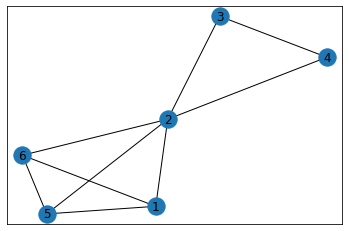

In [ ]:
g = nx.Graph()
g.add_edge(1,2)
g.add_edge(1,6)
g.add_edge(1,5)
g.add_edge(5,6)

g.add_edge(2,4)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,2)
g.add_edge(2,5)
g.add_edge(2,6)
g.add_edge(5,5)



pos = nx.spring_layout(g,iterations=100)
nx.draw_networkx(g,pos=pos)

In [ ]:
node_order = sorted(g.nodes())
style = {}
style['node_opacity'] = .8
style['vertex_size'] = 0.3
style['vertex_label'] = [x for x in node_order]
style["units"]="pt"
plot(g,"k.tex",layout=pos,**style)


In [ ]:
A = nx.to_numpy_matrix(g,nodelist=node_order)
a2l.to_ltx(A, frmt="{:0.0f}",arraytype = 'pmatrix')

\begin{pmatrix}
  0  &  1  &  0  &  0  &  1  &  1 \\
  1  &  0  &  1  &  1  &  1  &  1 \\
  0  &  1  &  0  &  1  &  0  &  0 \\
  0  &  1  &  1  &  0  &  0  &  0 \\
  1  &  1  &  0  &  0  &  1  &  1 \\
  1  &  1  &  0  &  0  &  1  &  0 
\end{pmatrix}


In [ ]:
A

matrix([[0., 1., 0., 0., 1., 1.],
        [1., 0., 1., 1., 1., 1.],
        [0., 1., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1.],
        [1., 1., 0., 0., 1., 0.]])

In [ ]:
q list(g.edges())

[(1, 2),
 (1, 6),
 (1, 5),
 (2, 4),
 (2, 3),
 (2, 5),
 (2, 6),
 (6, 5),
 (5, 5),
 (4, 3)]

In [ ]:
degrees = g.degree()
D = np.diag([degrees[n] for n in node_order])
a2l.to_ltx(D, frmt="{:0.0f}",arraytype = 'pmatrix')

\begin{pmatrix}
  3  &  0  &  0  &  0  &  0  &  0 \\
  0  &  5  &  0  &  0  &  0  &  0 \\
  0  &  0  &  2  &  0  &  0  &  0 \\
  0  &  0  &  0  &  2  &  0  &  0 \\
  0  &  0  &  0  &  0  &  5  &  0 \\
  0  &  0  &  0  &  0  &  0  &  3 
\end{pmatrix}


In [ ]:
L = D-A
a2l.to_ltx(L, frmt="{:0.0f}",arraytype = 'pmatrix')

\begin{pmatrix}
  3  & -1  &  0  &  0  & -1  & -1 \\
 -1  &  5  & -1  & -1  & -1  & -1 \\
  0  & -1  &  2  & -1  &  0  &  0 \\
  0  & -1  & -1  &  2  &  0  &  0 \\
 -1  & -1  &  0  &  0  &  4  & -1 \\
 -1  & -1  &  0  &  0  & -1  &  3 
\end{pmatrix}


In [ ]:
A2 = A*A
a2l.to_ltx(A2, frmt="{:0.0f}",arraytype = 'pmatrix')

\begin{pmatrix}
  3  &  2  &  1  &  1  &  3  &  2 \\
  2  &  5  &  1  &  1  &  3  &  2 \\
  1  &  1  &  2  &  1  &  1  &  1 \\
  1  &  1  &  1  &  2  &  1  &  1 \\
  3  &  3  &  1  &  1  &  4  &  3 \\
  2  &  2  &  1  &  1  &  3  &  3 
\end{pmatrix}


In [ ]:
from fractions import Fraction
transition = A/A.sum(axis=0)
a2l.to_ltx(transition,arraytype = 'pmatrix')

\begin{pmatrix}
  0.00 &  0.20 &  0.00 &  0.00 &  0.25 &  0.33\\
  0.33 &  0.00 &  0.50 &  0.50 &  0.25 &  0.33\\
  0.00 &  0.20 &  0.00 &  0.50 &  0.00 &  0.00\\
  0.00 &  0.20 &  0.50 &  0.00 &  0.00 &  0.00\\
  0.33 &  0.20 &  0.00 &  0.00 &  0.25 &  0.33\\
  0.33 &  0.20 &  0.00 &  0.00 &  0.25 &  0.00
\end{pmatrix}
